In [2]:
import pandas as pd
titanic_url='https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic = pd.read_excel(titanic_url, sheet_name = 'total')
titanic_df = titanic.drop(['body', 'home.dest'], axis = 1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [8]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'], bins = [0,3,7,15,30,60,100], include_lowest = True, labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'])
# bins   나눌 구간 경계값 리스트
# labels	각 구간의 이름	
# include_lowest=True	첫 번째 구간의 최소값 포함 여부	0도 포함하려면 True
# right=True	구간의 오른쪽 값 포함 여부 (기본값 True)

titanic_df.groupby('age_cat',observed = False )[['pclass', 'survived', 'age',	'sibsp',	'parch',	'fare']].mean()
# 숫자 컬럼[['pclass', 'survived', 'age',	'sibsp',	'parch',	'fare']] 만 출력
# observed = False  모든 범주(label)가 출력됨 (심지어 데이터가 없어도)
# observed=True  실제로 있는 값만 출력됨 (빈 그룹은 생략)

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


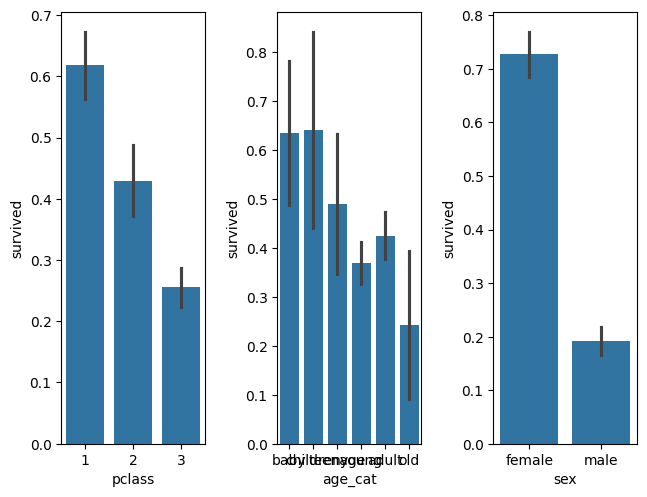

In [12]:
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

data = titanic_df
plt.subplot(131)
sns.barplot(x = 'pclass', y = 'survived', data= titanic_df)
plt.subplot(132)
sns.barplot(x = 'age_cat', y = 'survived', data = titanic_df)
plt.subplot(133)
sns.barplot(x ='sex', y = 'survived', data = titanic_df)
plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.10, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()